#### 1. Асимптотична складність алгоритму лінійного пошуку

- **Найгірший випадок:** `O(n)` — якщо елемент останній або його немає.
- **Найкращий випадок:** `O(1)` — якщо елемент перший.

**Як покращити:**
- Додати "бар’єр" (вартового) у кінець списку.
- Використовувати паралельний пошук на декількох ядрах.

#### 2. Асимптотична складність алгоритму бінарного пошуку

- **Найгірший випадок:** `O(log₂ n)`
- **Найкращий випадок:** `O(1)` — коли шуканий елемент одразу посередині.

> Бінарний пошук працює лише з **відсортованими** списками.

#### 3. Тернарний пошук

**Ідея:** розділяємо масив на **три частини**, порівнюємо з двома межовими елементами.

- **Найгірший випадок:** `O(log₃ n)`
- **Найкращий випадок:** `O(1)`

**Порівняння з бінарним:**

- `log₂ n < log₃ n` ⟶ **бінарний ефективніший**.
- Тернарний виконує **два порівняння** замість одного на кожному кроці.
- **Бінарний оптимальніший** в більшості випадків.

#### 4. Експериментальне дослідження (Python)

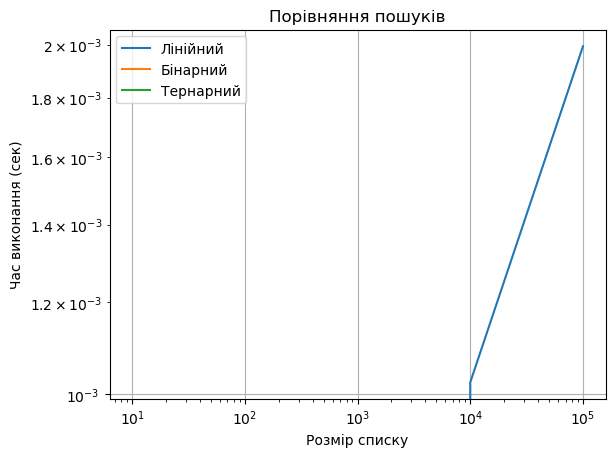

In [7]:
import time
import matplotlib.pyplot as plt
import random

sizes = [10**i for i in range(1, 6)]
lin_times, bin_times, tern_times = [], [], []

def linear_search(arr, target):
    for x in arr:
        if x == target:
            return True
    return False

def binary_search(arr, target):
    low, high = 0, len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return True
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return False

def ternary_search(arr, target):
    low, high = 0, len(arr) - 1
    while low <= high:
        third = (high - low) // 3
        mid1 = low + third
        mid2 = high - third
        if arr[mid1] == target or arr[mid2] == target:
            return True
        if target < arr[mid1]:
            high = mid1 - 1
        elif target > arr[mid2]:
            low = mid2 + 1
        else:
            low = mid1 + 1
            high = mid2 - 1
    return False

for size in sizes:
    arr = list(range(size))
    target = size - 1  # останній елемент (найгірший випадок для лінійного)

    start = time.time()
    linear_search(arr, target)
    lin_times.append(time.time() - start)

    start = time.time()
    binary_search(arr, target)
    bin_times.append(time.time() - start)

    start = time.time()
    ternary_search(arr, target)
    tern_times.append(time.time() - start)

plt.plot(sizes, lin_times, label="Лінійний")
plt.plot(sizes, bin_times, label="Бінарний")
plt.plot(sizes, tern_times, label="Тернарний")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Розмір списку")
plt.ylabel("Час виконання (сек)")
plt.title("Порівняння пошуків")
plt.legend()
plt.grid(True)
plt.show()

#### 5. Вплив відсортованості списку

- **Лінійний пошук:** працює і з відсортованими, і з не відсортованими списками.
- **Бінарний / Тернарний:** працюють тільки з **відсортованими**.

> Якщо список не відсортований, доведеться його попередньо впорядкувати (O(n log n)), що знижує ефективність.

#### 6. Сценарії використання

- **Лінійний пошук**
  - Коли дані не відсортовані
  - Невеликі масиви
  - Разовий або рідкісний пошук

- **Бінарний пошук**
  - Великі відсортовані масиви
  - Пошук у базах даних, словниках, телефонних книгах

- **Тернарний пошук**
  - Рідко використовується в масивах
  - Іноді застосовується в задачах оптимізації функцій на відрізку

### Контрольні питання

1. **Що таке алгоритм пошуку?**
   Алгоритм пошуку — це метод для знаходження елементів у структурі даних. Важливий для ефективної обробки даних у програмах.

2. **Критерії ефективності:**
   - Часова складність
   - Пам'яттєва складність
   - Підтримка відсортованих / не відсортованих даних

3. **Що таке лінійний пошук?**
   Перевіряє всі елементи по черзі. Простий, але повільний на великих масивах.

4. **Що потрібно для бінарного пошуку?**
   Дані повинні бути відсортовані.

5. **Переваги/недоліки бінарного пошуку:**
   + Швидкий (`O(log n)`)
   - Працює лише на відсортованих масивах

6. **Що таке тернарний пошук?**
   Поділяє масив на три частини замість двох (як у бінарному), але зазвичай менш ефективний.